In [1]:
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator
from pymatgen.analysis.diffraction.core import DiffractionPattern
from pymatgen.analysis.diffraction.core import get_unique_families
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [2]:
with MPRester("vLhgJsB0A5VPXcw8") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-570418")

In [3]:
view = quick_view (structure)
display(view)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

Visualisation cellule unité

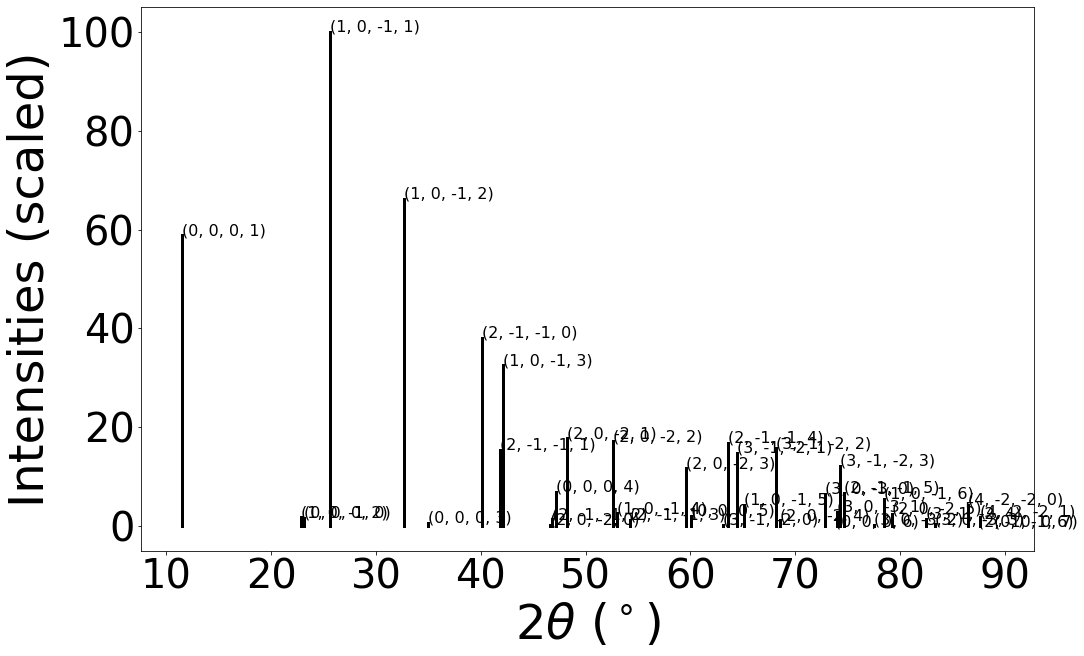

In [4]:
calculator = XRDCalculator(wavelength='CuKa1')
calculator.show_plot(structure)

Visualisation du difractogramme complet. Les pics sont nombreux et proches les uns des autres, ce qui les rend difficiles à distinguer. Nous allons donc regarder uniquement les premières valeurs de 2$\theta$ (°)

Le diffractogramme demandé dans l'énoncé correspond à un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. \
Dans les AVAILABLE_RADIATION répertoriées dans pymatgen pour l'argument wavelength de la classe XRDCalculator. \
La valeur de référence est "CuKa": 1.54184  \
Mais dans notre cas, nous privilégions "CuKa1": 1.54056 puisque cette valeur correspond à celle de l'énoncé

Remarque : nous observons qu'à chaque pic sont associés quatre indices de Miller. En effet, dans le système hexagonal, il existe un vecteur équivalent aux vecteurs de base a et b: 
$$d = - (a + b)$$ 
Un quatrième indice de Miller i (redondant) est donc introduit pour désigner une famille de plan (hkil):
$$i = - (h + k)$$

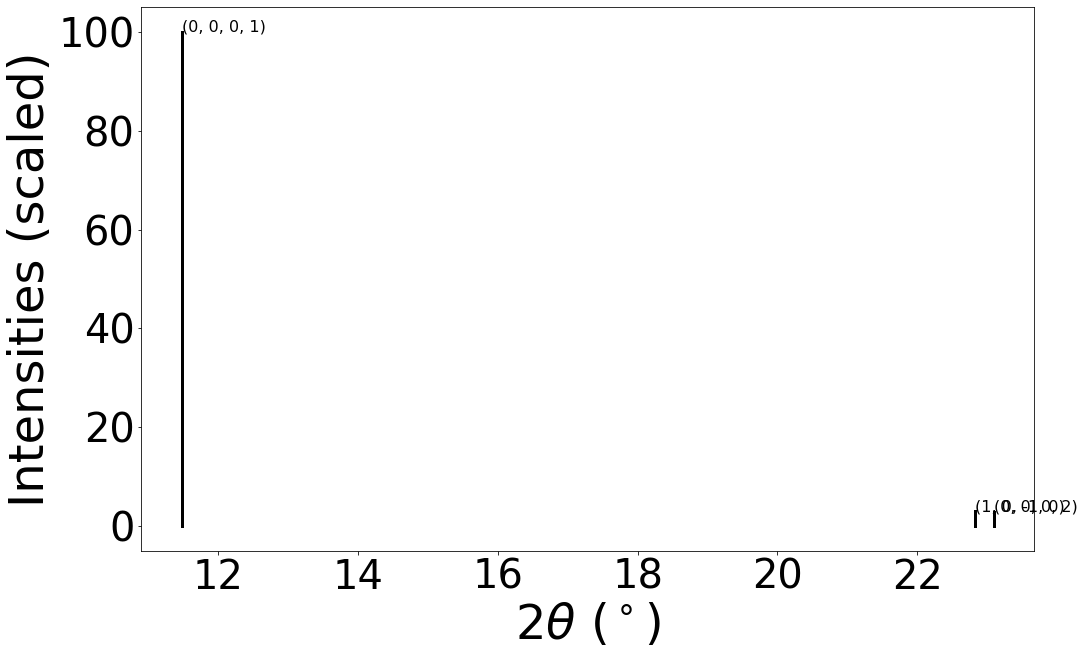

Limitons nous aux trois premiers pics :


- Premier pic de diffraction : 
  2θ = 11.486971507744025 °
  Intensité ([0,100]) :  100.0
  hk(i)l associés :  (0, 0, 0, 1)
  Multiplicité =  2


- Second pic de diffraction : 
  2θ = 22.8217108270796 °
  Intensité ([0,100]) :  3.005997211960433
  hk(i)l associés :  (1, 0, -1, 0)
  Multiplicité =  6


- Troisième pic de diffraction : 
  2θ = 23.09144700944195 °
  Intensité ([0,100]) :  2.944275324453283
  hk(i)l associés :  (0, 0, 0, 2)
  Multiplicité =  2


In [21]:
calculator.show_plot(structure,two_theta_range=(0, 25))
pattern = calculator.get_pattern(structure,two_theta_range=(0, 25))
print("Limitons nous aux trois premiers pics :")
print('\n')
print("- Premier pic de diffraction : ")
print("  2\u03B8 =", pattern.x[0], '°')
print("  Intensité ([0,100]) : ", pattern.y[0]) 
print("  hk(i)l associés : ", pattern.hkls[0][0]['hkl'])
print("  Multiplicité = ", pattern.hkls[0][0]['multiplicity'])
print('\n')
print("- Second pic de diffraction : ")
print("  2\u03B8 =", pattern.x[1], '°')
print("  Intensité ([0,100]) : ", pattern.y[1]) 
print("  hk(i)l associés : ", pattern.hkls[1][0]['hkl'])
print("  Multiplicité = ", pattern.hkls[1][0]['multiplicity'])
print('\n')
print("- Troisième pic de diffraction : ")
print("  2\u03B8 =", pattern.x[2], '°')
print("  Intensité ([0,100]) : ", pattern.y[2]) 
print("  hk(i)l associés : ", pattern.hkls[2][0]['hkl'])
print("  Multiplicité = ", pattern.hkls[2][0]['multiplicity'])